In [1]:
import torch
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt

## Variables are tensors that can have their gradients calculated 

In [2]:
v = torch.rand(5) * 10
x = Variable(v, requires_grad=True)
print(x, type(x))

Variable containing:
 3.7862
 4.4644
 4.1861
 6.6773
 5.5691
[torch.FloatTensor of size 5]
 <class 'torch.autograd.variable.Variable'>


## Lets create a line to learn

In [3]:
lin = Variable(torch.FloatTensor(list(range(5))))
target =  lin * 2 + 1  # y = 2x + 1

## We can calculate the loss between our line and a random vector

In [5]:
# loss using MSE
loss = (target-x).pow(2).sum() / x.size(0)
print(loss)

Variable containing:
 4.4890
[torch.FloatTensor of size 1]



## Backpropogate the error
calling `.backward()` on a Variable that has been computed backpropogates the error for all parent variables that require gradients

In [6]:
loss.backward()

## Gradients of x

In [7]:
x.grad.data


 1.1145
 0.5857
-0.3256
-0.1291
-1.3724
[torch.FloatTensor of size 5]

## Plot of target, random line, dx/dtarget

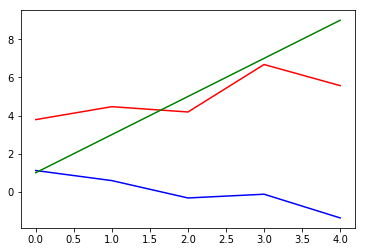

In [8]:
plt.plot(x.data.numpy(), color="red")
plt.plot(x.grad.data.numpy(), color="blue")
plt.plot(target.data.numpy(), color="green")

## Update the x Variable and zero the gradients on x

In [9]:
lr = .1
x.data -= lr * x.grad.data
x.grad.data.zero_()


 0
 0
 0
 0
 0
[torch.FloatTensor of size 5]

## Plot of x and target after the update

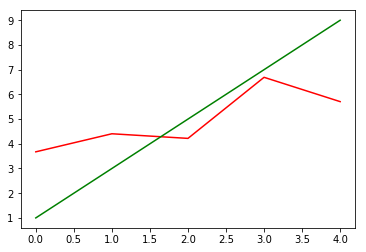

In [10]:
plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")

## Basic Gradient Decent by hand

epoch: 0 loss:20.68513298034668
epoch: 1 loss:13.238484382629395
epoch: 2 loss:8.47262954711914
epoch: 3 loss:5.422482490539551
epoch: 4 loss:3.470388412475586
epoch: 5 loss:2.22104811668396
epoch: 6 loss:1.4214714765548706
epoch: 7 loss:0.9097416400909424
epoch: 8 loss:0.5822347402572632
epoch: 9 loss:0.3726300895214081
epoch: 10 loss:0.23848313093185425
epoch: 11 loss:0.15262936055660248
epoch: 12 loss:0.09768278151750565
epoch: 13 loss:0.06251713633537292
epoch: 14 loss:0.04001099616289139
epoch: 15 loss:0.025606965646147728
epoch: 16 loss:0.01638842187821865
epoch: 17 loss:0.010488629341125488
epoch: 18 loss:0.006712697446346283
epoch: 19 loss:0.004296125378459692
epoch: 20 loss:0.002749545034021139
epoch: 21 loss:0.0017596827819943428
epoch: 22 loss:0.001126184593886137
epoch: 23 loss:0.0007207439048215747
loss is now less than 0.001!


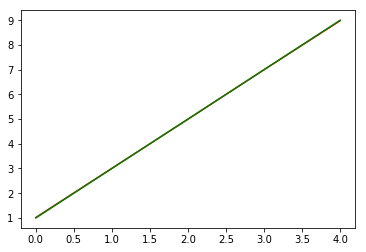

In [11]:
lr = .1
for i in range(100):

    loss = (target-x).pow(2).sum()
    print('epoch: {} loss:{}'.format(i, loss.data[0]))
    if loss.data[0] < 0.001:  # break if pretty close
        print('loss is now less than 0.001!')
        break

    loss.backward()
    x.data = x.data - (lr * x.grad.data)

    x.grad.data.zero_()

plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")
plt.show()
    


## Using built in optimizers

In [12]:
import torch.optim as optim

In [13]:
x = Variable(torch.rand(5) * 10, requires_grad=True)
lin = Variable(torch.FloatTensor(list(range(5))))
target =  lin * 2 + 1  # y = 2x + 1

All optimizers base off of `torch.optim.Optimizer` and only need to implement `__init__` and `step()`, and maintain the convention of `params` and `lr` being the first two constructor parameters.

This means its really easy to use different optimizers for models, you just change one line

In [14]:
# optimizers all take an iterable of things to update, lr is usually optional
# try a few out!

optimizer = optim.SGD([x], lr=0.1)
# optimizer = optim.Adam([x], lr=0.1)
# optimizer = optim.RMSprop([x], lr=.1)
# optimizer = optim.Adamax([x], lr=.1)

epoch: 0 loss:83.71208190917969
epoch: 1 loss:53.57573699951172
epoch: 2 loss:34.288475036621094
epoch: 3 loss:21.944622039794922
epoch: 4 loss:14.044560432434082
epoch: 5 loss:8.988516807556152
epoch: 6 loss:5.752651691436768
epoch: 7 loss:3.6816980838775635
epoch: 8 loss:2.3562865257263184
epoch: 9 loss:1.5080235004425049
epoch: 10 loss:0.9651350378990173
epoch: 11 loss:0.6176865100860596
epoch: 12 loss:0.39531952142715454
epoch: 13 loss:0.25300437211990356
epoch: 14 loss:0.16192284226417542
epoch: 15 loss:0.10363058745861053
epoch: 16 loss:0.06632360070943832
epoch: 17 loss:0.04244717210531235
epoch: 18 loss:0.027166202664375305
epoch: 19 loss:0.01738639362156391
epoch: 20 loss:0.011127309873700142
epoch: 21 loss:0.007121483329683542
epoch: 22 loss:0.0045577590353786945
epoch: 23 loss:0.0029169651679694653
epoch: 24 loss:0.0018668571719899774
epoch: 25 loss:0.0011947889579460025
epoch: 26 loss:0.0007646625163033605
loss is now less than 0.001!


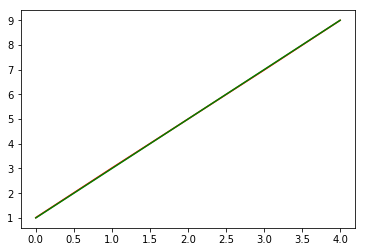

In [15]:
for i in range(1000):
    loss = (target-x).pow(2).sum()
    print('epoch: {} loss:{}'.format(i, loss.data[0]))
    if loss.data[0] < 0.001:  # break if pretty close
        print('loss is now less than 0.001!')
        break
    
    loss.backward()
    optimizer.step()
    x.grad.data.zero_()

plt.plot(x.data.numpy(), color="red")
plt.plot(target.data.numpy(), color="green")
plt.show()